In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os, shutil, glob

import warnings
warnings.simplefilter(action='ignore')

import pingouin as pg
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme('paper', 'whitegrid')

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from argparse import Namespace
from utils import load_data, PAQ_CCW

In [11]:
HOME = os.getcwd()
DATA = os.path.join(HOME, '..', 'data')
calib_mode = 'hats'

df = load_data(DATA, calib_mode)

In [12]:
p1df = pd.read_csv('../data/p1tha.csv').set_index('PAQ')

## Reliability Check

In [28]:
tab = []

iccs = {}

for p in PAQ_CCW:
    
    cols = []
    alph, ci = pg.cronbach_alpha(df, subject='pid', items='stimulus_id', scores=p)
    ic = pg.intraclass_corr(df, raters='pid', ratings=p, targets='stimulus_id').set_index('Type')
    
    cols += [
        f"tha{p.capitalize()}",
        # f"{alph:.3f}",
        # f"[{ci[0]:.3f}, {ci[1]:.3f}]",
        f"{ic.loc['ICC2']['ICC']:.3f}",
        f"[{ic.loc['ICC2']['CI95%'][0]:.3f}, {ic.loc['ICC2']['CI95%'][1]:.3f}]",
        f"{ic.loc['ICC2']['F']:.3f}",
        f"$<$0.001",
        f"{ic.loc['ICC2k']['ICC']:.3f}",
        f"[{ic.loc['ICC2k']['CI95%'][0]:.3f}, \\replaced{{{ic.loc['ICC2k']['CI95%'][1]:.3f}}}{{{ic.loc['ICC2']['CI95%'][1]:.3f}}}]",
        f"{ic.loc['ICC2k']['F']:.3f}",
        f"$<$0.001",
    ]
    tab.append(" & ".join(cols))
    
    iccs[p] = [ic.loc['ICC2']['ICC'], ic.loc['ICC2k']['ICC']]
    
print("\\\\ \n".join(tab) + "\\\\")

thaPl & 0.571 & [0.440, 0.720] & 42.341 & $<$0.001 & 0.971 & [0.950, \replaced{0.980}{0.720}] & 42.341 & $<$0.001\\ 
thaVi & 0.590 & [0.460, 0.730] & 41.750 & $<$0.001 & 0.973 & [0.960, \replaced{0.990}{0.730}] & 41.750 & $<$0.001\\ 
thaEv & 0.252 & [0.160, 0.400] & 11.425 & $<$0.001 & 0.894 & [0.830, \replaced{0.940}{0.400}] & 11.425 & $<$0.001\\ 
thaCh & 0.571 & [0.440, 0.720] & 44.172 & $<$0.001 & 0.971 & [0.950, \replaced{0.980}{0.720}] & 44.172 & $<$0.001\\ 
thaAn & 0.547 & [0.420, 0.700] & 39.817 & $<$0.001 & 0.968 & [0.950, \replaced{0.980}{0.700}] & 39.817 & $<$0.001\\ 
thaMo & 0.412 & [0.290, 0.580] & 20.235 & $<$0.001 & 0.946 & [0.910, \replaced{0.970}{0.580}] & 20.235 & $<$0.001\\ 
thaUn & 0.256 & [0.160, 0.410] & 11.186 & $<$0.001 & 0.896 & [0.830, \replaced{0.940}{0.410}] & 11.186 & $<$0.001\\ 
thaCa & 0.593 & [0.460, 0.740] & 47.907 & $<$0.001 & 0.973 & [0.960, \replaced{0.990}{0.740}] & 47.907 & $<$0.001\\


In [14]:
for p, (icc2, icc2k) in iccs.items():
    p1df.loc[p, 'ICC2'] = icc2
    p1df.loc[p, 'ICC2k'] = icc2k

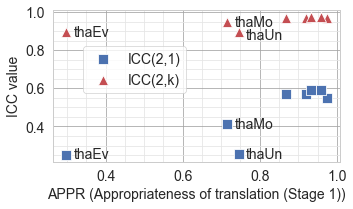

In [15]:
global_fontsize = 14

f, ax = plt.subplots(figsize=(5,3), tight_layout=True)

sns.scatterplot(p1df, x='APPR',y='ICC2', marker='s', c='b', s=100, ax=ax, label='ICC(2,1)', legend=None) # s sets the marker size
sns.scatterplot(p1df, x='APPR',y='ICC2k', marker='^', c='r', s=100, ax=ax, label='ICC(2,k)', legend=None)

ax.figure.legend(loc='upper left', bbox_to_anchor=(0.220, 0.8), fontsize = global_fontsize)

for p in ['ev', 'mo', 'un']:
    ax.text(x=p1df.loc[p, 'APPR'] + 0.02, y=p1df.loc[p, 'ICC2'], s=f"tha{p.capitalize()}", ha='left', va='center', fontsize = global_fontsize)
    ax.text(x=p1df.loc[p, 'APPR'] + 0.02, y=p1df.loc[p, 'ICC2k'] + (-1 * (p == 'un'))*0.02, s=f"tha{p.capitalize()}", ha='left', va='center', fontsize = global_fontsize)
    
ax.set_xlabel('APPR (Appropriateness of translation (Stage 1))', fontsize = global_fontsize)
ax.set_ylabel('ICC value', fontsize = global_fontsize)
ax.tick_params(labelsize = global_fontsize)
plt.grid(which='major', color = '#A5A5A5')
plt.grid(which='minor', color = '#E5E5E5')
plt.minorticks_on()
ax.grid(visible=True)

plt.savefig('figs/appr_vs_icc.png', dpi=300)
plt.show()

Expected output of the above block:

<img src='figs/appr_vs_icc.png' width=400>